# What is autocorrelation?

Autocorrelation is a statistical measure that describes the degree of similarity between a given time series and a lagged version of itself over time. In other words, it measures the extent to which observations in a time series are correlated with one another as a function of the time lag between them.

Autocorrelation estimates the influence of all past observed values on the currently observed value. This differs from partial autocorrelation in which only a single past observed value is measured for influence on the currently observed value.


# Data
Data  contain number of air passengers by months and years.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/air-passenger-data-for-time-series-analysis/AirPassengers.csv


In [2]:
data = pd.read_csv('/kaggle/input/air-passenger-data-for-time-series-analysis/AirPassengers.csv')

data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# Plot the data
fig = px.line(data, x='Month', y='#Passengers',
              labels=({'#Passengers': 'Passengers', 'Month': 'Date'}))

fig.update_layout(template="simple_white", font=dict(size=18),
                  title_text='Airline Passengers', width=650,
                  title_x=0.5, height=400)

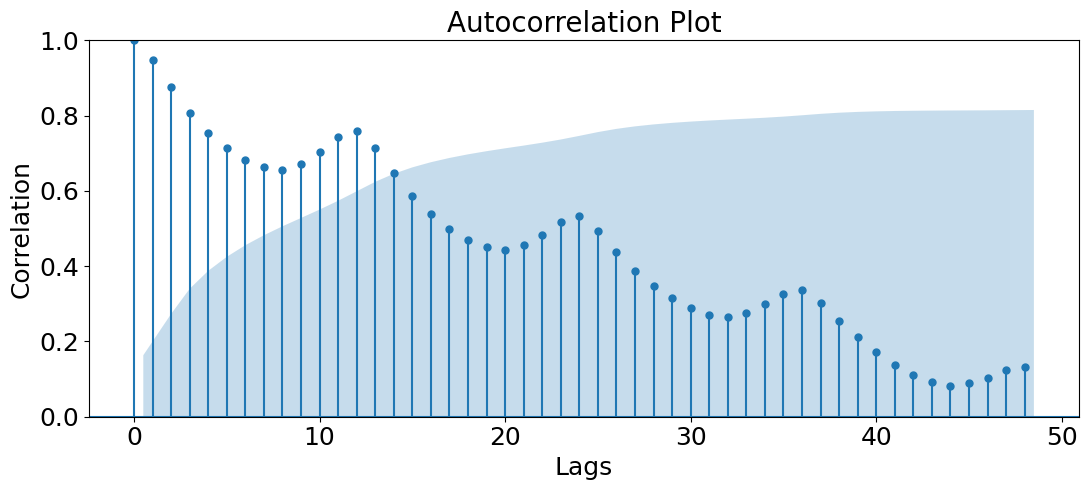

In [4]:
# Plot autocorrelation
plt.rc("figure", figsize=(11,5))
plot_acf(data['#Passengers'], lags=48)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

The blue shaded region is the confidence interval with a default value of α = 0.05. Anything within this range represents a value that has no significant correlation with the most recent value.

The vertical lines with markers at their tops are the “lags” that represent a specific number (50, in this case) of previous values. These represent the correlation value (shown on the y-axis) and diminish at a steady rate as their proximity from the current price increases. That’s not the case with all data but certainly so with ours.

![](https://www.alpharithms.com/wp-content/uploads/977/autocorrelation-anatomy-python-1536x864.jpg)